# M1 - Data Collection & Understanding


In [1]:
import pandas as pd

In [108]:
matches = pd.read_csv("matches.csv")
deliveries = pd.read_csv("deliveries.csv")
players = pd.read_csv("players.csv")

In [109]:
matches

,match_id,season,team1,team2,venue,winner,match_date
0,1,2024,LSG,DC,Kolkata,KKR,2020-03-21
1,2,2024,LSG,PBKS,Mumbai,LSG,2020-03-22
2,3,2022,GT,PBKS,Hyderabad,RR,2020-03-23
3,4,2020,PBKS,CSK,Kolkata,PBKS,2020-03-24
4,5,2022,DC,KKR,Delhi,SRH,2020-03-25
...,...,...,...,...,...,...,...
215,160,2021,LSG,DC,Chennai,RR,2020-08-27
216,185,2020,KKR,RR,Bangalore,MI,2020-09-21
217,156,2021,CSK,PBKS,Kolkata,MI,2020-08-23
218,28,2024,LSG,DC,Mumbai,MI,2020-04-17


In [110]:
deliveries

,match_id,inning,over,ball,batsman_runs,bowler_runs,is_wicket
0,969,1,6,3,1.0,2.0,0.0
1,84,2,11,4,4.0,6.0,1.0
2,223,1,7,5,0.0,0.0,1.0
3,1578,2,4,5,6.0,0.0,0.0
4,1301,2,18,2,4.0,1.0,0.0
...,...,...,...,...,...,...,...
13495,1241,1,16,1,6.0,6.0,0.0
13496,885,2,18,6,3.0,6.0,0.0
13497,541,2,19,3,2.0,NaN,0.0
13498,1690,2,7,2,2.0,2.0,NaN


In [111]:
players

,player_id,player_name,team,role
0,1,Player_1,RCB,Batsman
1,2,Player_2,PBKS,Wicket-Keeper
2,3,Player_3,SRH,Batsman
3,4,Player_4,RCB,Batsman
4,5,Player_5,GT,Wicket-Keeper
...,...,...,...,...
2295,1613,Player_1613,GT,NaN
2296,1749,Player_1749,RCB,Wicket-Keeper
2297,452,Player_452,SRH,Batsman
2298,1520,Player_1520,DC,All-Rounder


# M2 - Data Cleaning & Preprocessing

In [112]:
# Check missing values
print(matches.isnull().sum())
print(deliveries.isnull().sum())

match_id       0
season         0
team1          0
team2          0
venue          0
winner        34
match_date     0
dtype: int64
match_id           0
inning             0
over               0
ball               0
batsman_runs    1863
bowler_runs     1977
is_wicket       4447
dtype: int64


In [113]:
# Fill missing winners (No Result matches)
matches['winner'] = matches['winner'].fillna("No Result")

In [114]:
# Convert date format
matches['match_date'] = pd.to_datetime(matches['match_date'])

In [115]:
# Fix column mismatch
deliveries.rename(columns={'over': 'overs'}, inplace=True)

In [116]:
# Remove duplicates
matches.drop_duplicates(inplace=True)
deliveries.drop_duplicates(inplace=True)

In [117]:
import mysql.connector

In [118]:

conn = mysql.connector.connect(
    host="localhost",
    user="root",
    password="@Reva1234",
    database="ipl_db"
)

cursor = conn.cursor()

# Insert Matches Data
for _, row in matches.iterrows():
    cursor.execute("""
        INSERT INTO matches 
        (match_id, season, team1, team2, venue, winner, match_date)
        VALUES (%s, %s, %s, %s, %s, %s, %s)
    """, tuple(row))

conn.commit()
print("ETL Process Completed 🚀")


ETL Process Completed 🚀


# M3 – Analytics & KPI Generation
## Dashboard 1: Team Performance
### Highest Wins Across Seasons

In [84]:
team_wins = matches['winner'].value_counts()

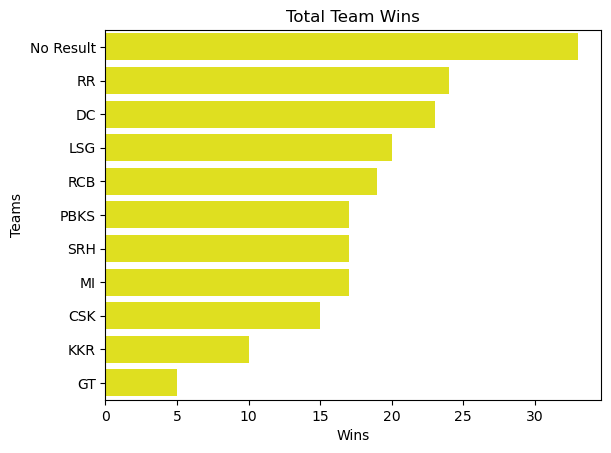

In [89]:
sns.barplot(x=team_wins.values, y=team_wins.index, color='Yellow')
plt.title("Total Team Wins")
plt.xlabel("Wins")
plt.ylabel("Teams")
plt.show()

### Season-wise Team Dominance

In [34]:
season_team = matches.groupby(['season','winner']).size().reset_index(name='wins')
season_team.head()

,season,winner,wins
0,2020,CSK,6
1,2020,DC,7
2,2020,KKR,1
3,2020,LSG,6
4,2020,MI,5


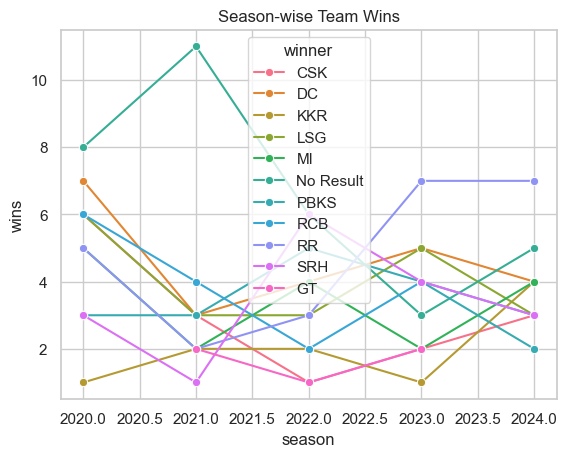

In [96]:
sns.lineplot(data=season_team, x='season', y='wins', hue='winner', marker='o')
plt.title("Season-wise Team Wins")
plt.show()

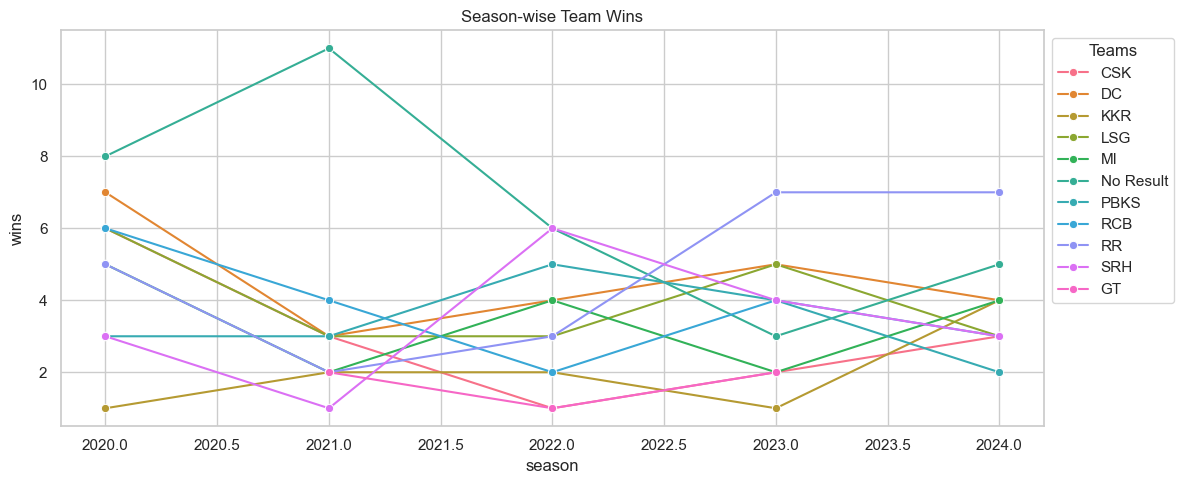

In [95]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 5))
sns.lineplot(data=season_team, x='season', y='wins', hue='winner', marker='o')
plt.title("Season-wise Team Wins")-
plt.legend(title='Teams', bbox_to_anchor=(1, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Wins by Venue

In [48]:
wins_by_venue = matches.groupby(['venue','winner']).size().reset_index(name='wins')
wins_by_venue.head()

,venue,winner,wins
0,Ahmedabad,CSK,1
1,Ahmedabad,DC,3
2,Ahmedabad,GT,2
3,Ahmedabad,LSG,2
4,Ahmedabad,MI,2


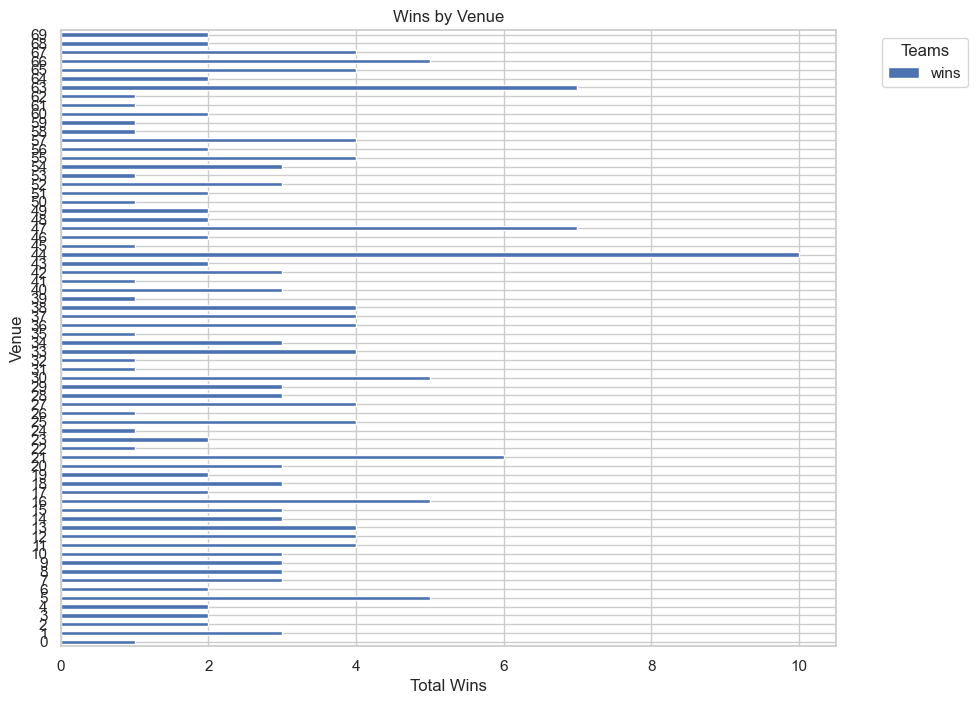

In [124]:
wins_by_venue.plot(kind='barh', stacked=True, figsize=(10, 8))
plt.title("Wins by Venue")
plt.xlabel("Total Wins")
plt.ylabel("Venue")
plt.legend(title="Teams", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

## Dashboard 2: Match Insights
### Average Runs Per Match

In [50]:
runs_per_match = deliveries.groupby('match_id')[
    ['batsman_runs','bowler_runs']
].sum()

runs_per_match['total_runs'] = runs_per_match['batsman_runs'] + runs_per_match['bowler_runs']

avg_runs = runs_per_match['total_runs'].mean()
print("Average Runs Per Match:", avg_runs)


Average Runs Per Match: 27.594188376753507


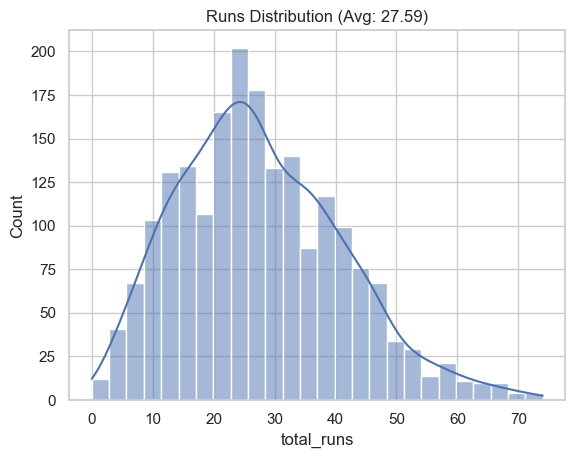

In [125]:
sns.histplot(runs_per_match['total_runs'], kde=True)
plt.title(f"Runs Distribution (Avg: {avg_runs:.2f})")
plt.show()

### Matches with No Result

In [128]:
no_result = matches[matches['winner'] == "No Result"]
result_count=len(no_result)
print("No Result Matches:", result_count)


No Result Matches: 33


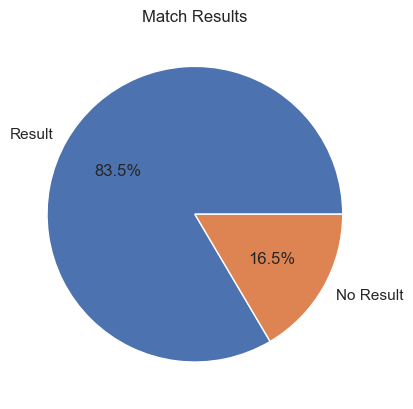

In [129]:
plt.pie(result_counts, labels=result_counts.index, autopct='%1.1f%%')
plt.title("Match Results")
plt.show()

### Home vs Away Performance

In [15]:
home_wins = (matches['winner'] == matches['team1']).sum()
away_wins = (matches['winner'] == matches['team2']).sum()

print("Home Wins:", home_wins)
print("Away Wins:", away_wins)

Home Wins: 21
Away Wins: 19


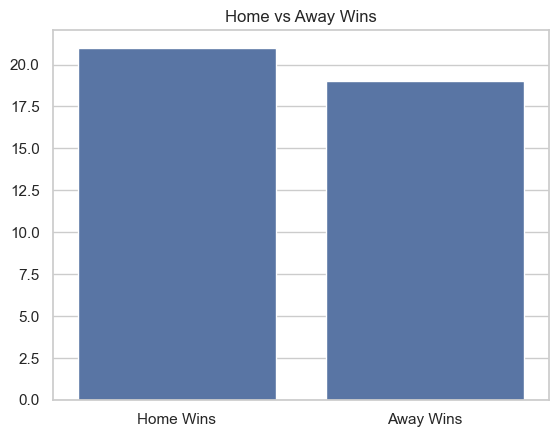

In [131]:
sns.barplot(x=['Home Wins', 'Away Wins'], y=[home_wins, away_wins])
plt.title("Home vs Away Wins")
plt.show()

## Dashboard 3: Player & Ball Analytics

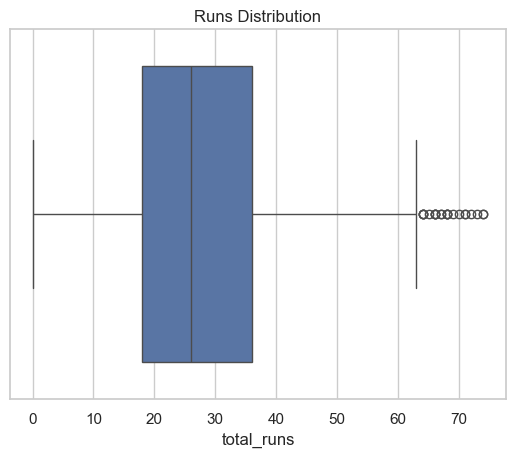

In [132]:
sns.boxplot(x=runs_per_match['total_runs'])
plt.title("Runs Distribution")
plt.show()

In [16]:
# Wickets per match
wickets_per_match = deliveries[deliveries['is_wicket'] == 1].groupby('match_id').size()
wickets_per_match

match_id
1       3
2       1
3       3
4       2
5       3
       ..
1996    2
1997    1
1998    5
1999    1
2000    2
Length: 1742, dtype: int64

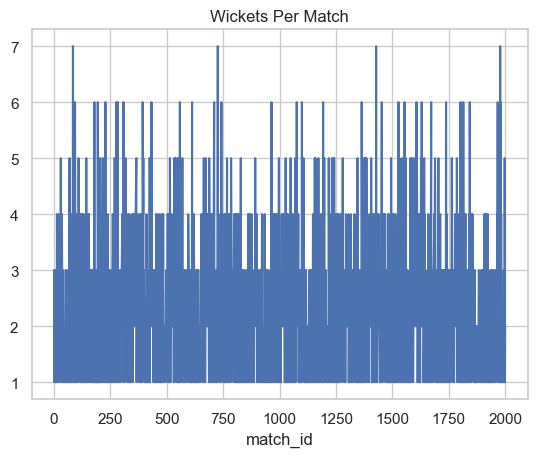

In [133]:
wickets_per_match = deliveries[deliveries['is_wicket'] == 1].groupby('match_id').size()

sns.lineplot(x=wickets_per_match.index, y=wickets_per_match.values)
plt.title("Wickets Per Match")
plt.show()


In [17]:
# High scoring matches (200+)
high_scoring = runs_per_match[runs_per_match['total_runs'] > 200]
print(high_scoring.head())

Empty DataFrame
Columns: [batsman_runs, bowler_runs, total_runs]
Index: []


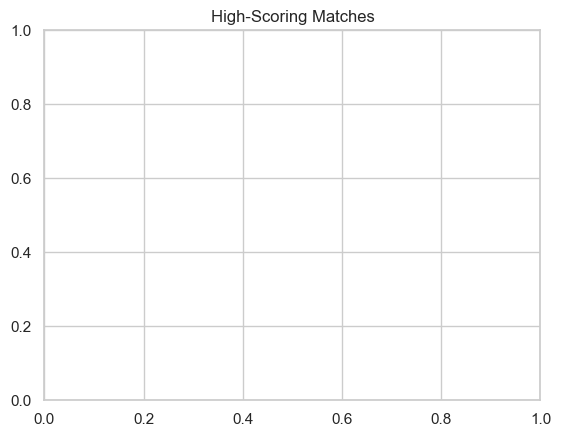

In [134]:
high_scoring = runs_per_match[runs_per_match['total_runs'] > 200]

sns.scatterplot(x=high_scoring.index, y=high_scoring['total_runs'])
plt.title("High-Scoring Matches")
plt.show()

# M4 – Visualization & Final Dashboard
## Team Wins Visualization

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

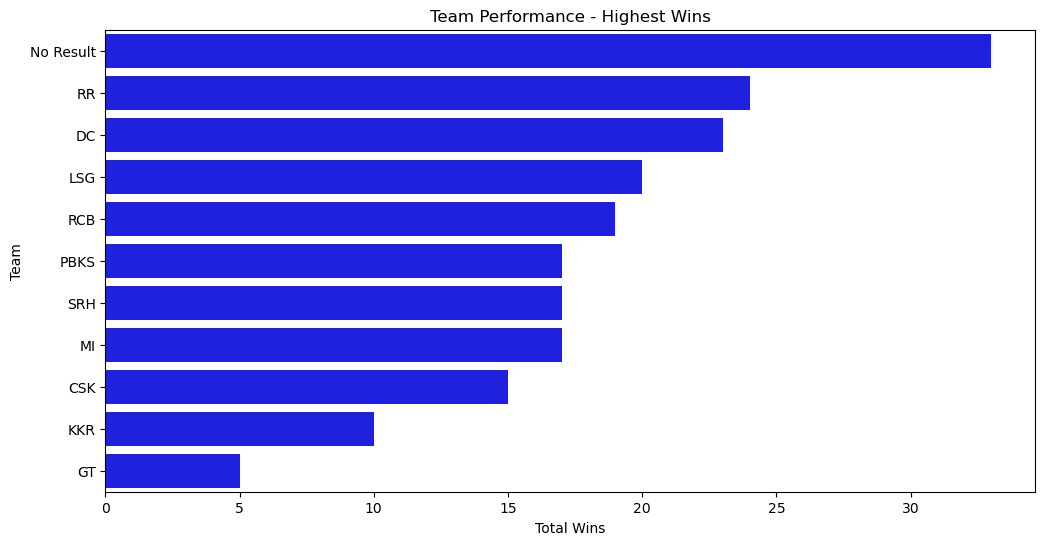

In [19]:
plt.figure(figsize=(12,6))
sns.barplot(x=team_wins.values, y=team_wins.index,color='blue')
plt.title("Team Performance - Highest Wins")
plt.xlabel("Total Wins")
plt.ylabel("Team")
plt.show()

## Runs Distribution per Match

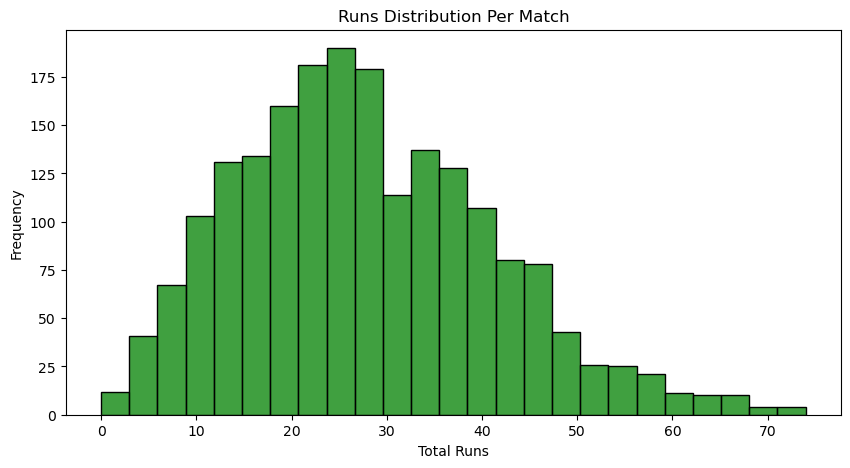

In [20]:
plt.figure(figsize=(10,5))
sns.histplot(runs_per_match['total_runs'], bins=25,color='green')
plt.title("Runs Distribution Per Match")
plt.xlabel("Total Runs")
plt.ylabel("Frequency")
plt.show()

## Top 5 Teams by Win %

In [136]:
matches_played = pd.concat([matches['team1'], matches['team2']]).value_counts()
wins = matches['winner'].value_counts()
win_percentage = (wins / matches_played) * 100

top5 = win_percentage.sort_values(ascending=False).head(5)

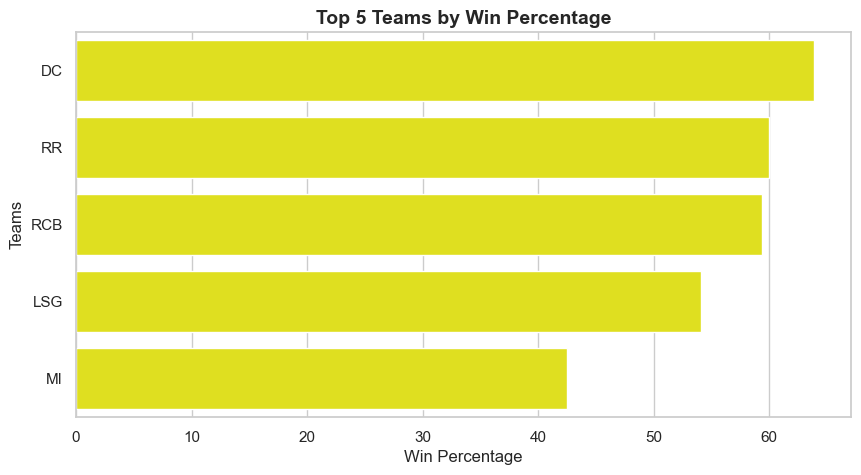

In [138]:
plt.figure(figsize=(10,5))
sns.barplot(x=top5.values, y=top5.index,color='yellow')
plt.title("Top 5 Teams by Win Percentage", fontsize=14, fontweight='bold')
plt.xlabel("Win Percentage")
plt.ylabel("Teams")
plt.show()

### Match Outcome Predictability

In [140]:
predictability = matches['winner'].value_counts(normalize=True) * 100


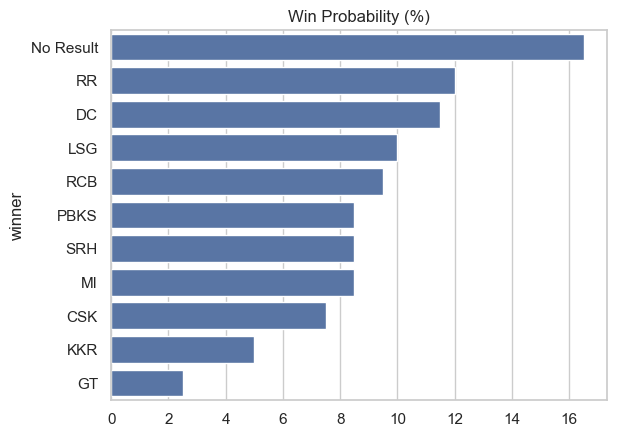

In [141]:
sns.barplot(x=predictability.values, y=predictability.index)
plt.title("Win Probability (%)")
plt.show()


### Impact of Venue on Results

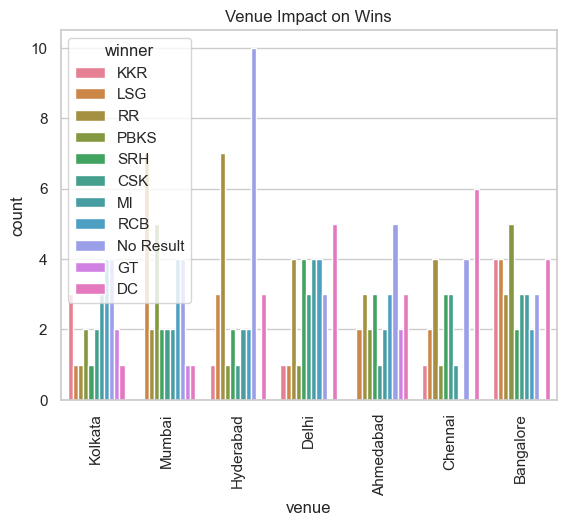

In [142]:
sns.countplot(data=matches, x='venue', hue='winner')
plt.xticks(rotation=90)
plt.title("Venue Impact on Wins")
plt.show()